#### Select Search 算法

图像的尺寸: 864000
图像的类型: <class 'numpy.ndarray'>
图像标签的维度： (600, 480, 4)
297
候选区： 592


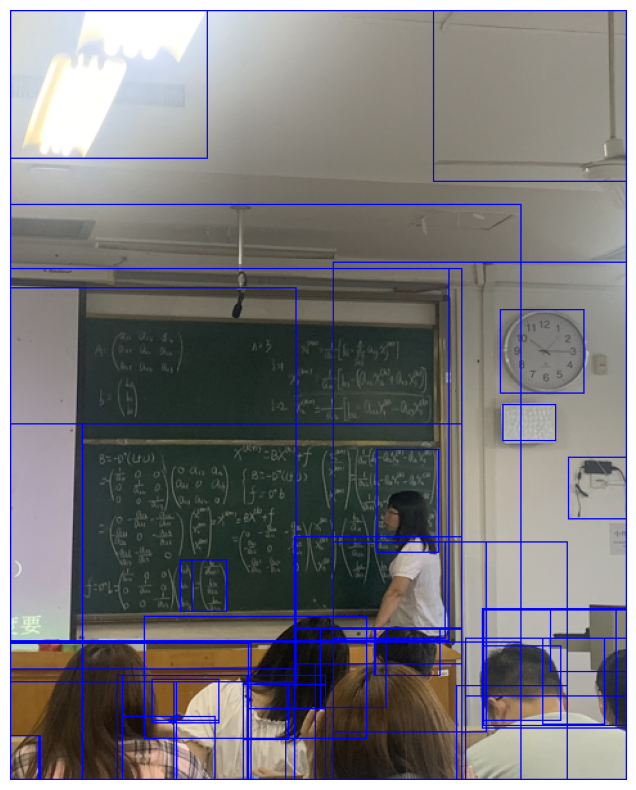

In [7]:
%matplotlib inline
import cv2
import skimage.data
import matplotlib.pyplot as plt
from PIL import Image
import skimage.data
import selectivesearch
import numpy as np
# 获取图片
# img = skimage.data.astronaut()
img_path = 'image/demo.png'
img = Image.open(img_path)
# 调整图片大小，减小计算量
img = img.resize((480,600))
img = np.array(img)
print('图像的尺寸:',img.size)
print('图像的类型:',type(img))
# 得到图像标签和区域位置
img_lbl,regions = selectivesearch.selective_search(img,scale=500,sigma=0.9,min_size=10)
print('图像标签的维度：',img_lbl.shape)
#计算一共分割了多少个原始候选区域
temp = set()
for i in range(img_lbl.shape[0]):
    for j in range(img_lbl.shape[1]):    
        temp.add(img_lbl[i,j,3]) 
print(len(temp))
 
print('候选区：',len(regions))#计算利用Selective Search算法得到了多少个候选区域
 
#创建一个集合 元素list(左上角x，左上角y,宽,高)
candidates = set()
for r in regions:
    if r['rect'] in candidates:#排除重复的候选区
        continue
    if r['size'] < 500:#排除小于 2000 pixels的候选区域(并不是bounding box中的区域大小)  
        continue
    x, y, w, h = r['rect']
    if w / h > 2 or h / w > 2: #排除扭曲的候选区域边框  即只保留近似正方形的
        continue
    candidates.add(r['rect'])
   # 加入候选框 
for x, y, w, h in candidates:
    #print(x, y, w, h)
    cv2.rectangle(img, (x, y), ( x+w,y+h), (0, 0, 255), 1) 
# 设置画布大小    
plt.figure(figsize=(12,10))
# 
plt.imshow(img)
# 显示坐标轴
plt.axis('off')
# 保存画的图
plt.savefig('ss.png')
plt.show()